In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.svm import SVC

In [111]:
df=pd.read_csv("train_ctrUa4K.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [112]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [114]:
df["Self_Employed"].unique()

array(['No', 'Yes', nan], dtype=object)

In [115]:
df["Self_Employed"].isnull().sum()

32

In [116]:
df["Self_Employed"].mode()

0    No
dtype: object

In [117]:
df["Gender"].mode()

0    Male
dtype: object

In [118]:
df["Married"].mode()

0    Yes
dtype: object

In [119]:
df["Dependents"].mode()

0    0
dtype: object

In [120]:
df["Education"].mode()

0    Graduate
dtype: object

In [121]:
df["Total_income"]=(df["ApplicantIncome"]+df["CoapplicantIncome"])/1000
df["Total_income"]=(df["Total_income"]).round(decimals=0)
df['loan_amount_term']=(df["Loan_Amount_Term"])/60

In [122]:
df['loan_amount_term'].median()

6.0

In [123]:
df['Credit_History'].mode()

0    1.0
dtype: float64

In [124]:
df['Property_Area'].mode()

0    Semiurban
dtype: object

In [125]:
df['Property_Area']=df['Property_Area'].fillna("Semiurban")

In [126]:
df['Credit_History']=df['Credit_History'].fillna(1.0)

In [127]:
df['loan_amount_term']=df['loan_amount_term'].fillna(6.0).astype(int)

In [128]:
df["Dependents"]=df['Dependents'].fillna('3+').astype(str)

In [129]:
df["Married"]=df["Married"].fillna('Yes')

In [130]:
df["Gender"]=df["Gender"].fillna("Male")

In [131]:
df["Self_Employed"]=df["Self_Employed"].fillna("No")

In [132]:
df["LoanAmount"]=df["LoanAmount"].fillna(df["LoanAmount"].median())

In [133]:
df["loan_amount_term"]=df["loan_amount_term"].fillna(df["loan_amount_term"].mean())

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  Total_income       614 non-null    float64
 14  loan_amount_term   614 non-null    int32  
dtypes: float64(5), int32(1), int64(1), object(8)
memory usage: 69.7+ KB


In [135]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income,loan_amount_term
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,6.0,6
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6.0,6
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3.0,6
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,5.0,6
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,3.0,6
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4.0,3
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8.0,6
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,8.0,6


In [95]:
df.drop(columns=["Loan_ID","ApplicantIncome","CoapplicantIncome","Loan_Amount_Term"],axis=1,inplace=True)

In [96]:
df["Dependents"].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [104]:
gender={"Male":0,"Female":1}
married={"No":0,"Yes":1}
dependents={'3+': 3}
education={"Graduate":1,"Not Graduate":0}
self_employed={"No":0,"Yes":1}
Property_area={"Urban":0,"Rural":1,"Semiurban":2}
loan_status={"Y":1,"N":0}

In [105]:
df["Gender"]=df["Gender"].map(gender)
df["Married"]=df["Married"].map(married)
df["Education"]=df["Education"].map(education)
df["Self_Employed"]=df["Self_Employed"].map(self_employed)
df["Property_Area"]=df["Property_Area"].map(Property_area)
df["Loan_Status"]=df["Loan_Status"].map(loan_status)

In [106]:
df.describe()

,Gender,Married,Education,Self_Employed,LoanAmount,Credit_History,Property_Area,Loan_Status,Total_income,loan_amount_term
count,0.0,0.0,0.0,0.0,614.000000,614.000000,0.0,0.0,614.000000,614.000000
mean,NaN,NaN,NaN,NaN,146.412162,0.855049,NaN,NaN,7.043974,5.701954
std,NaN,NaN,NaN,NaN,84.037468,0.352339,NaN,NaN,6.478955,1.096084
min,NaN,NaN,NaN,NaN,9.000000,0.000000,NaN,NaN,1.000000,0.000000
25%,NaN,NaN,NaN,NaN,100.250000,1.000000,NaN,NaN,4.000000,6.000000
50%,NaN,NaN,NaN,NaN,129.000000,1.000000,NaN,NaN,5.000000,6.000000
75%,NaN,NaN,NaN,NaN,164.750000,1.000000,NaN,NaN,7.750000,6.000000
max,NaN,NaN,NaN,NaN,700.000000,1.000000,NaN,NaN,81.000000,8.000000


In [63]:
df

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Credit_History,Property_Area,Loan_Status,Total_income,loan_amount_term
0,0,0,0,1,0,146.412162,1.0,0,1,6.0,6
1,0,1,1,1,0,128.000000,1.0,1,0,6.0,6
2,0,1,0,1,1,66.000000,1.0,0,1,3.0,6
3,0,1,0,0,0,120.000000,1.0,0,1,5.0,6
4,0,0,0,1,0,141.000000,1.0,0,1,6.0,6
...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,1,0,71.000000,1.0,1,1,3.0,6
610,0,1,3+,1,0,40.000000,1.0,1,1,4.0,3
611,0,1,1,1,0,253.000000,1.0,0,1,8.0,6
612,0,1,2,1,0,187.000000,1.0,0,1,8.0,6


In [33]:
X=df.drop("Loan_Status",axis=1)
Y=df["Loan_Status"]
bestfeatures = SelectKBest(score_func=chi2, k=8)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['column','Score']  #naming the dataframe columns
print(featureScores.nlargest(8,'Score')) 


             column      Score
4        LoanAmount  39.211545
5    Credit_History  26.005877
6     Property_Area   4.398854
7      Total_income   3.441199
1           Married   1.782425
2         Education   0.988390
0            Gender   0.162407
8  loan_amount_term   0.051496


In [34]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.2,random_state=0)

In [35]:
clf=DecisionTreeClassifier(criterion='entropy',splitter="random",max_depth=5,presort='deprecated',random_state=42)

In [36]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='random')

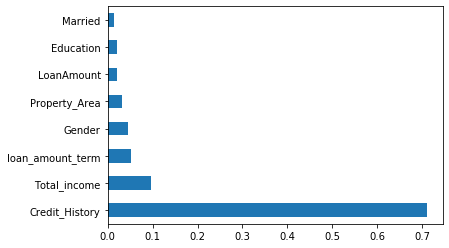

In [37]:
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.show()

In [69]:
y_pred=clf.predict(x_test)

In [70]:
print(accuracy_score(y_test,y_pred)*100)

83.73983739837398


In [ ]:
svc=SVC(C=0.1,kernel='poly',gamma=2)
svc.fit(x_train,y_train)

In [150]:
y_pred=svc.predict(x_test)

In [151]:
print(accuracy_score(y_test,y_pred))

0.7317073170731707
